In [1]:
import os
from glob import glob
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import support as sp
import pims as pm

from IPython.display import HTML

idx = pd.IndexSlice
%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [8]:
filePath = "C:/Users/Eric/Desktop/curves_v3.dat" #No coordinates, correct file is CurrentDensity
current = pd.read_csv(filePath ,sep = "\t")
#current = pd.read_csv(r"‪C:\Users\Eric\Desktop\curves.dat" ,sep = "\t", index_col=[0,1,2])
#pd.read_csv(r"‪C:\Users\Eric\Desktop\curves.dat",sep="\t", header = None)
#current = current.filter(["File Name","sigma","test","N particles","lambda","omega","radius","co_vel","mean_vel"])
current["density"] = current["N particles"]*4/(2*np.pi*current.radius)
current["norm_current"] = current.mean_vel*current.density/current.co_vel

current.head()

,sigma,test,p_density,File Name,N particles,co_vel,codens,error,lambda,mean_vel,omega,radius,sing_codens,vel_error,norm_codens,norm_coerror,density,norm_current
0,0.98,0,0.04,Test30_20190617,1.0,0.347264,0.013891,0.000000,4.1832,0.347264,0.72,17.43,0.012684,0.000000,0.040000,0.000000,0.036524,0.036524
1,0.98,1,0.11,Test29_20190617,3.0,0.347264,0.028860,0.000455,4.1832,0.262363,0.72,17.43,0.012684,0.004137,0.083107,0.001310,0.109573,0.082784
2,0.98,2,0.22,Test28_20190617,6.0,0.347264,0.028533,0.000486,4.1832,0.129695,0.72,17.43,0.012684,0.002209,0.082165,0.001400,0.219146,0.081846
3,0.98,3,0.33,Test27_20190617,9.0,0.347264,0.033324,0.000628,4.1832,0.100981,0.72,17.43,0.012684,0.001904,0.095961,0.001809,0.328719,0.095588
4,0.98,4,0.40,Test26_20190617,11.0,0.347264,0.036578,0.000968,4.1832,0.091445,0.72,17.43,0.012684,0.002419,0.105331,0.002786,0.401768,0.105797


In [9]:
sigma = 0.62
current.loc[(current.sigma==0.62)]

,sigma,test,p_density,File Name,N particles,co_vel,codens,error,lambda,mean_vel,omega,radius,sing_codens,vel_error,norm_codens,norm_coerror,density,norm_current
32,0.62,0,0.02,Test61_20190617,1.0,0.401178,0.008024,0.000000,6.5928,0.401178,0.46,27.47,0.009297,0.000000,0.020000,0.000000,0.023175,0.023175
33,0.62,1,0.12,Test60_20190617,5.0,0.401178,0.047047,0.000189,6.5928,0.392060,0.46,27.47,0.009297,0.001577,0.117273,0.000472,0.115875,0.113242
34,0.62,2,0.21,Test59_20190617,9.0,0.401178,0.081678,0.000717,6.5928,0.388941,0.46,27.47,0.009297,0.003414,0.203595,0.001787,0.208576,0.202214
35,0.62,3,0.30,Test58_20190617,13.0,0.401178,0.117884,0.000401,6.5928,0.392947,0.46,27.47,0.009297,0.001336,0.293845,0.000999,0.301276,0.295095
36,0.62,4,0.39,Test57_20190617,17.0,0.401178,0.150752,0.000888,6.5928,0.386544,0.46,27.47,0.009297,0.002276,0.375774,0.002212,0.393977,0.379605
37,0.62,5,0.51,Test56_20190617,22.0,0.401178,0.196640,0.001092,6.5928,0.385569,0.46,27.47,0.009297,0.002141,0.490157,0.002722,0.509852,0.490015
38,0.62,6,0.60,Test55_20190617,26.0,0.401178,0.234906,0.001084,6.5928,0.391509,0.46,27.47,0.009297,0.001806,0.585539,0.002701,0.602552,0.588030
39,0.62,7,0.70,Test54_20190617,30.0,0.401178,0.275175,0.001124,6.5928,0.393107,0.46,27.47,0.009297,0.001606,0.685916,0.002801,0.695253,0.681265
40,0.62,8,0.81,Test53_20190617,35.0,0.401178,0.327397,0.001424,6.5928,0.404193,0.46,27.47,0.009297,0.001758,0.816088,0.003550,0.811128,0.817225
41,0.62,9,0.93,Test52_20190617,40.0,0.401178,0.395219,0.001570,6.5928,0.424966,0.46,27.47,0.009297,0.001689,0.985145,0.003914,0.927004,0.981971


In [10]:
density = 0.93
sample = current[(current.sigma==sigma) & (current.p_density==0.93)]
sample

,sigma,test,p_density,File Name,N particles,co_vel,codens,error,lambda,mean_vel,omega,radius,sing_codens,vel_error,norm_codens,norm_coerror,density,norm_current
41,0.62,9,0.93,Test52_20190617,40.0,0.401178,0.395219,0.00157,6.5928,0.424966,0.46,27.47,0.009297,0.001689,0.985145,0.003914,0.927004,0.981971


In [13]:
directory = r"C:\Users\Eric\Desktop\BASEP_tests"

def find_file(sample):
    directory_date = os.path.join(directory,sample["File Name"].values[0][-8:])
    for filename in glob(os.path.join(directory_date+'/*')):
        if sample["File Name"].values[0][:8] in os.path.split(filename)[1]:
            if ".avi" in filename:
                return filename
            
def create_video(sample):
    video = pm.open(find_file(sample))
    circle = sp.find_image_center(video[0],
                                  part_radius = np.round(2/0.1805)*2-1, minmass = 2000,
                                  vis = False)

    return sp.animation_trapRF(video,2*sample.omega, circle = circle, pad = 23)

C:\Users\Eric\Anaconda3\lib\site-packages\pims\api.py:191: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: list indices must be integers or slices, not av.video.stream.VideoStream
  warn(message)
deprecated pixel format used, make sure you did set range correctly


AttributeError: 'PyAVReaderIndexed' object has no attribute 'frame_rate'

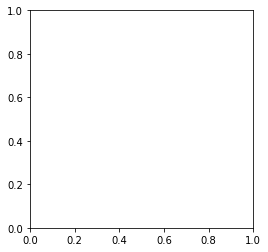

In [14]:
anim = create_video(sample)

In [ ]:
HTML(anim.to_html5_video())

In [15]:
video = pm.open(r"C:\Users\Eric\Desktop\BASEP_tests\20190617\Test52_2019_06_17_19_03_24.avi")

C:\Users\Eric\Anaconda3\lib\site-packages\pims\api.py:191: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: list indices must be integers or slices, not av.video.stream.VideoStream
  warn(message)


In [19]:
dir(video)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_as_grey',
 '_current_packet',
 '_demuxed_container',
 '_dtype',
 '_frame_cursor',
 '_get',
 '_im_sz',
 '_initialize',
 '_len',
 '_load_fresh_file',
 '_packet_cursor',
 '_seek_packet',
 '_slicerator_flag',
 '_toc',
 '_validate_process_func',
 'class_exts',
 'class_priority',
 'close',
 'exts',
 'filename',
 'frame_shape',
 'get_frame',
 'pixel_type',
 'process_func',
 'propagate_attrs']

In [23]:
video.frame_shape

(488, 648, 3)

In [31]:
video.codeccontext.VideoCodecContext

AttributeError: 'PyAVReaderIndexed' object has no attribute 'codeccontext'

In [29]:
video.framerate

AttributeError: 'PyAVReaderIndexed' object has no attribute 'framerate'

In [28]:
video.__getattr__

AttributeError: 'PyAVReaderIndexed' object has no attribute '__getattr__'

In [ ]:
HTML(anim.to_html5_video())

In [24]:
video.__dict__

{'_dtype': numpy.uint8,
 'filename': 'C:\\Users\\Eric\\Desktop\\BASEP_tests\\20190617\\Test52_2019_06_17_19_03_24.avi',
 '_toc': array([    1,     2,     3, ..., 11014, 11015, 11015], dtype=int32),
 '_len': 11015,
 '_im_sz': (488, 648, 3),
 '_demuxed_container': <generator at 0x1b7c91c7210>,
 '_current_packet': [<av.VideoFrame #0, pts=0 yuvj420p 648x488 at 0x1b7c809fd48>],
 '_packet_cursor': 0,
 '_frame_cursor': 0,
 'process_func': <function pims.base_frames.FramesStream._validate_process_func.<locals>.<lambda>(x)>}

In [18]:
fr = video.frame_rate

AttributeError: 'PyAVReaderIndexed' object has no attribute 'frame_rate'